This notebook tests the usage of Laplacian for blur detection

In [1]:
from matplotlib import pyplot as plt
from src.main.flags_global import FLAGS
FLAGS.mark_as_parsed()
from src.input_feed.image_feed.folder_feed import FolderFeedSync
from src.utils.preprocessing_utils import variance_of_laplacian
import os

Error: Does not exist sound mixer library.
   > pip3 install pygame
Error: Does not exist ffmpeg.
   > brew install ffmpeg # on MacOSX
   or
   > sudo apt install -y ffmpeg # on Ubuntu


In [2]:
folder_dir_path = r"C:\Users\cernil\OneDrive - Y Soft Corporation a.s\DeepLearningBlackbox\btn_floor_only\JPEGImages"
image_input = FolderFeedSync(folder_dir_path)

In [3]:
skip_x_images = 1
for x in range(skip_x_images):
    image = image_input.get_frame()

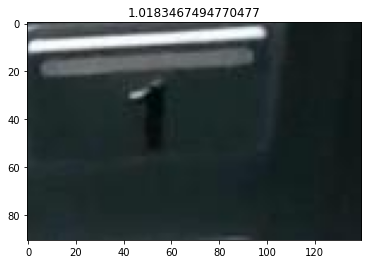

In [4]:
image = image_input.get_frame()
fm = variance_of_laplacian(image)
metric = fm / (image.shape[0] + image.shape[1])
plt.title(str(metric))
plt.imshow(image)
plt.show()

In [3]:
import cv2
x = []
badly_scored = {'index':[], 'score':[]}
bad_scored = {'index':[], 'score':[]}
godly_scored = {'index':[], 'score':[]}
try:
    for file_index in range(len(os.listdir(folder_dir_path))-20):
        image = image_input.get_frame()
        image = cv2.GaussianBlur(image,(5,5),0)
        fm = variance_of_laplacian(image)
        metric = 100 * fm / (image.shape[0] * image.shape[1])
        x.append(metric)
        if metric <= 0.011:
            badly_scored['index'].append(file_index)
            badly_scored['score'].append(metric)
        if 0.011 < metric < 0.022:
            bad_scored['index'].append(file_index)
            bad_scored['score'].append(metric)
        if metric > 5:
            godly_scored['index'].append(file_index)
            godly_scored['score'].append(metric)

except ValueError or AssertionError:
    pass

[0.01092531 0.14252018 0.21167484 0.99405692]


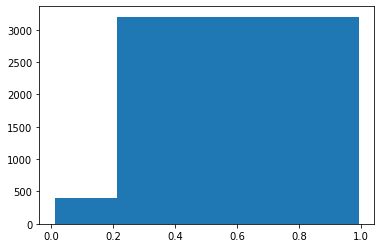

In [4]:
import numpy as np
percentiles = np.percentile(x, [0,5,10,50])
print(percentiles[:][:])
plt.hist(x,percentiles)
plt.show()

In [5]:
from IPython.display import clear_output

def show_scored_images(dict_of_samples, show_visual_output=True):
    image_input_2 = FolderFeedSync(folder_dir_path)
    image = image_input_2.get_frame() # to correspond with indexes
    last_index = 0
    i = 0
    for index_move in dict_of_samples['index']:
        index_score = dict_of_samples['score'][i]
        for _ in range(index_move-last_index):
            image = image_input_2.get_frame()
        i += 1
        last_index = index_move
        if show_visual_output:
            plt.title(str(index_score))
            plt.imshow(image)
            plt.show()
            clear_output(wait=True)

show_scored_images(badly_scored, show_visual_output=True)
show_scored_images(bad_scored, show_visual_output=True)
show_scored_images(godly_scored)

KeyboardInterrupt: 